In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#@title Demographic Table
demographic=pd.read_excel('/content/Telco_customer_churn_demographics.xlsx')
demographic.head()


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [ ]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [ ]:
demographic['Count'].value_counts()
demographic.drop(['Count'], axis=1,inplace=True)


In [ ]:
demographic.nunique()

Customer ID             7043
Gender                     2
Age                       62
Under 30                   2
Senior Citizen             2
Married                    2
Dependents                 2
Number of Dependents      10
dtype: int64

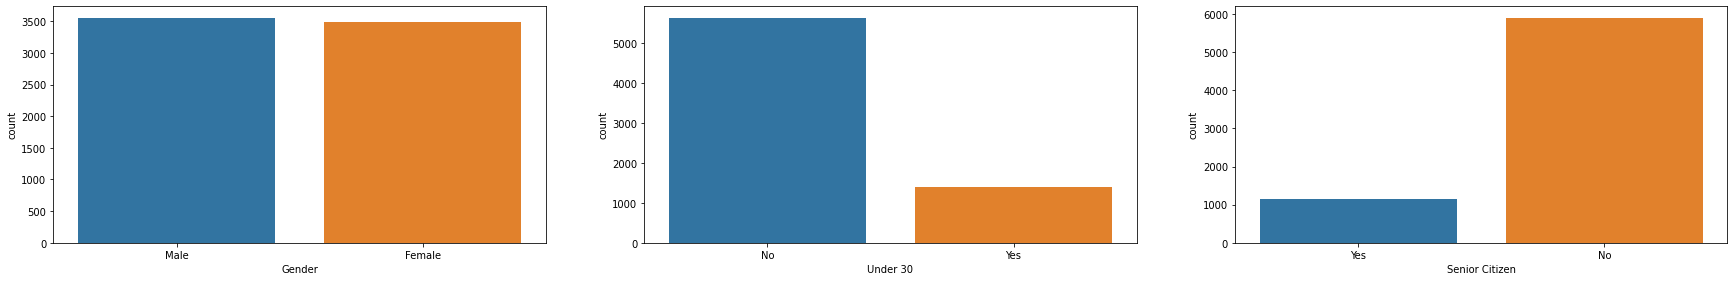

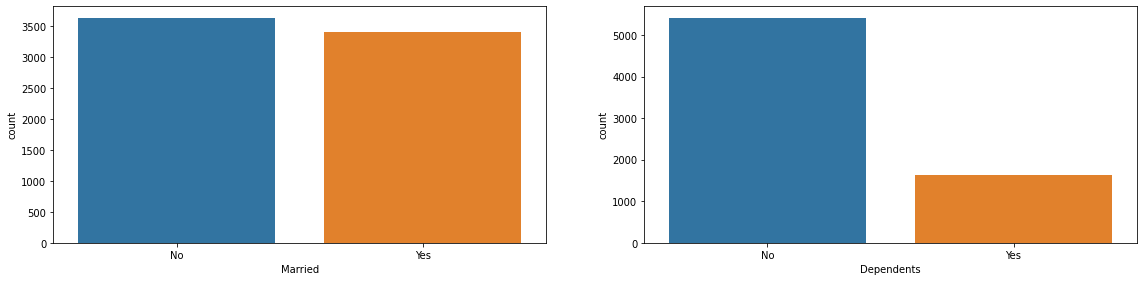

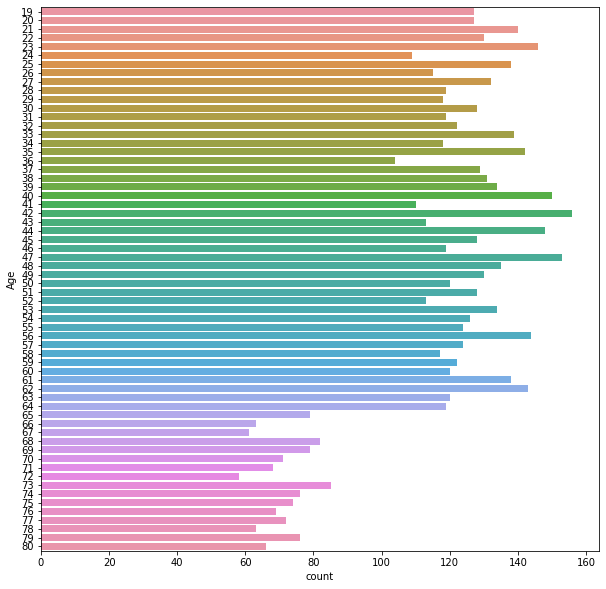

In [ ]:
plt.figure(figsize= (30,20))
#Count of Male and Female
plt.subplot(4,3,1)
sns.countplot(x=demographic['Gender'],data=demographic)
#Count if Peole under 30
plt.subplot(4,3,2)
sns.countplot(x=demographic['Under 30'],data=demographic)
plt.subplot(4,3,3)
sns.countplot(x=demographic['Senior Citizen'],data=demographic)
plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(x=demographic['Married'],data=demographic)
plt.subplot(4,3,2)
sns.countplot(x=demographic['Dependents'],data=demographic)
plt.figure(figsize= (10,10))
sns.countplot(y=demographic['Age'],data=demographic)


In [ ]:
#@title Location Table
location=pd.read_excel('/content/Telco_customer_churn_location.xlsx')
location.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [ ]:
#Location only contains data about Usa and California State so drop those 3 columns
location.drop(['Count','Country','State'], axis=1,inplace=True)
location.drop(['Lat Long','Latitude','Longitude'], axis=1,inplace=True)


In [ ]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  7043 non-null   object
 1   City         7043 non-null   object
 2   Zip Code     7043 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
#@title First Merge


first=pd.merge(demographic, location, 
                 on='Customer ID', 
                   how='outer')
first.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602


In [ ]:
#@title Population 
population=pd.read_excel('/content/Telco_customer_churn_population.xlsx')
population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          1671 non-null   int64
 1   Zip Code    1671 non-null   int64
 2   Population  1671 non-null   int64
dtypes: int64(3)
memory usage: 39.3 KB


In [ ]:
population.drop(['ID'], axis=1,inplace=True)


In [ ]:
#@title Second Merge


second=pd.merge(first, population, 
                 on='Zip Code', 
                   how='left')
second.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,68701
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,55668
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,47534
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,27778
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,26265


In [ ]:
second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Gender                7043 non-null   object
 2   Age                   7043 non-null   int64 
 3   Under 30              7043 non-null   object
 4   Senior Citizen        7043 non-null   object
 5   Married               7043 non-null   object
 6   Dependents            7043 non-null   object
 7   Number of Dependents  7043 non-null   int64 
 8   City                  7043 non-null   object
 9   Zip Code              7043 non-null   int64 
 10  Population            7043 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 660.3+ KB


In [ ]:
#@title Services 
services=pd.read_excel('/content/Telco_customer_churn_services.xlsx')
services.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [ ]:
services.nunique()

Customer ID                          7043
Count                                   1
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                    

In [ ]:
services.drop(['Count','Quarter'], axis=1,inplace=True)


In [ ]:
#@title Third Merge

third=pd.merge(second, services, 
                 on='Customer ID', 
                   how='outer')
third.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
third.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   City                               7043 non-null   object 
 9   Zip Code                           7043 non-null   int64  
 10  Population                         7043 non-null   int64  
 11  Referred a Friend                  7043 non-null   objec

In [ ]:
#@title Status
status=pd.read_excel('/content/Telco_customer_churn_status.xlsx')
status.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [ ]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


In [ ]:
status.nunique()

Customer ID           7043
Count                    1
Quarter                  1
Satisfaction Score       5
Customer Status          3
Churn Label              2
Churn Value              2
Churn Score             81
CLTV                  3438
Churn Category           5
Churn Reason            20
dtype: int64

In [ ]:
status.drop(['Count','Quarter','Churn Label','CLTV','Churn Reason','Churn Score','Satisfaction Score'], axis=1,inplace=True)


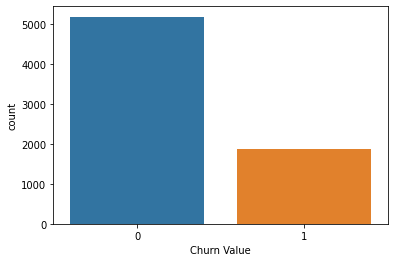

In [ ]:
#Number of People churned where 2000 and who does not churn were 5000
sns.countplot(x=status['Churn Value'],data=status)

In [ ]:
#@title Merging

fourth=pd.merge(third, status, 
                 on='Customer ID', 
                   how='outer')
fourth.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Value,Churn Category
0,8779-QRDMV,Male,78,No,Yes,No,No,0,Los Angeles,90022,...,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Churned,1,Competitor
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,...,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Churned,1,Competitor
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,...,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Churned,1,Competitor
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,...,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Churned,1,Dissatisfaction
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,...,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Churned,1,Price


In [ ]:
#@title

tel_customer = fourth.drop(columns=['Customer ID','Zip Code','Referred a Friend','Dependents','Senior Citizen','Under 30'])


In [ ]:
#@title Churn Reasons
#Use this dataframe to know sequence between refusal feedback and other features
#For example when do customers go to other competitors? what specifc segment of people we should focus on

Enhance=tel_customer[tel_customer['Churn Category'].notnull()]



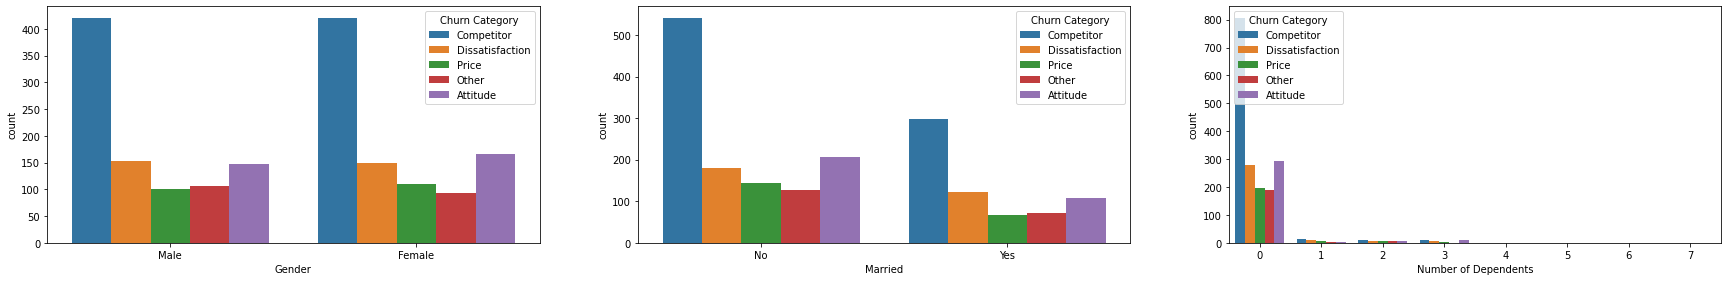

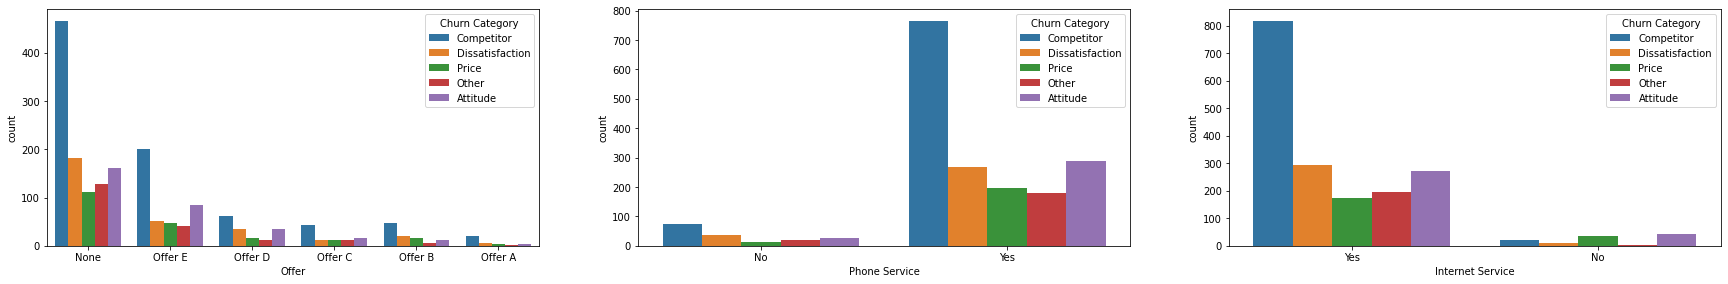

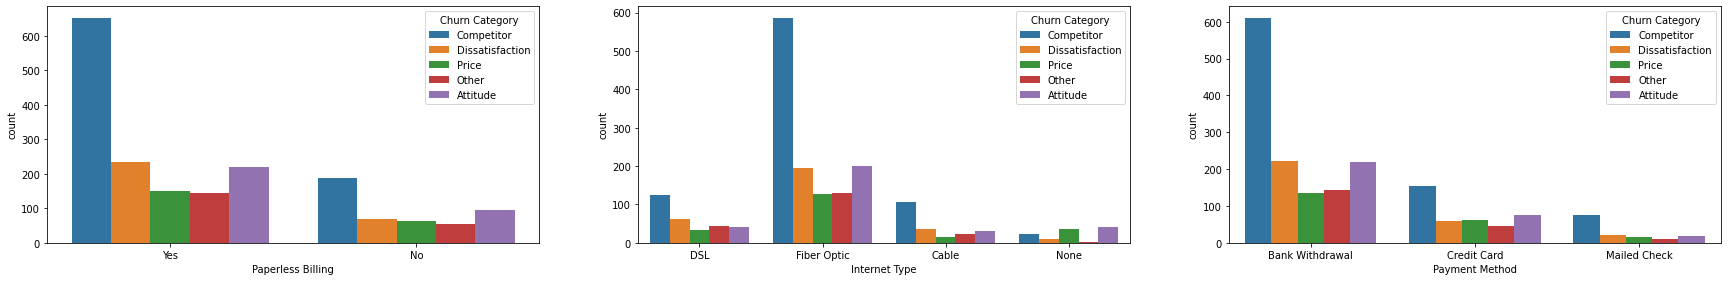

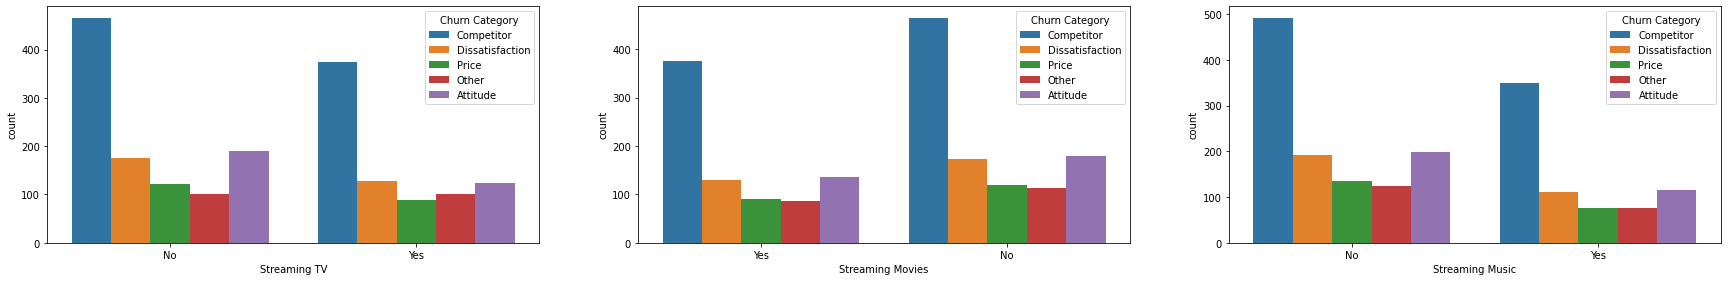

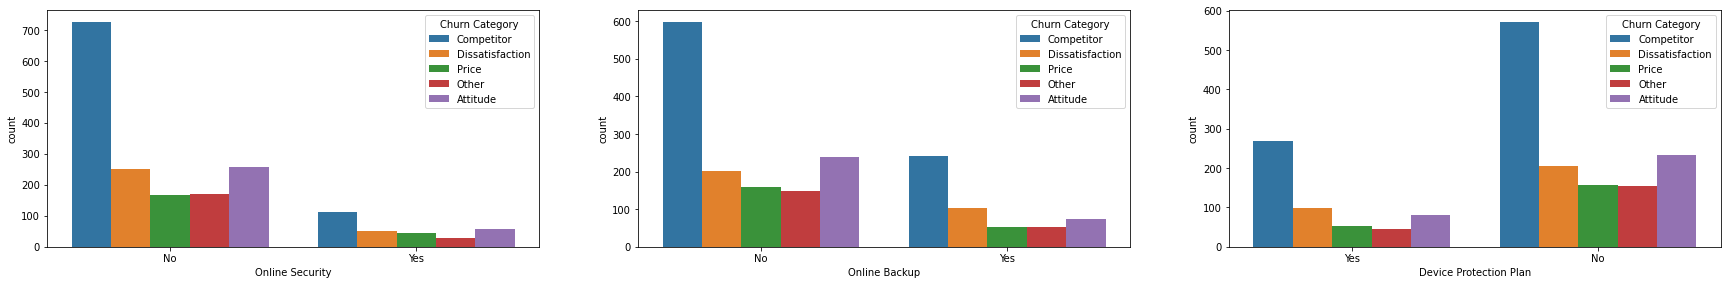

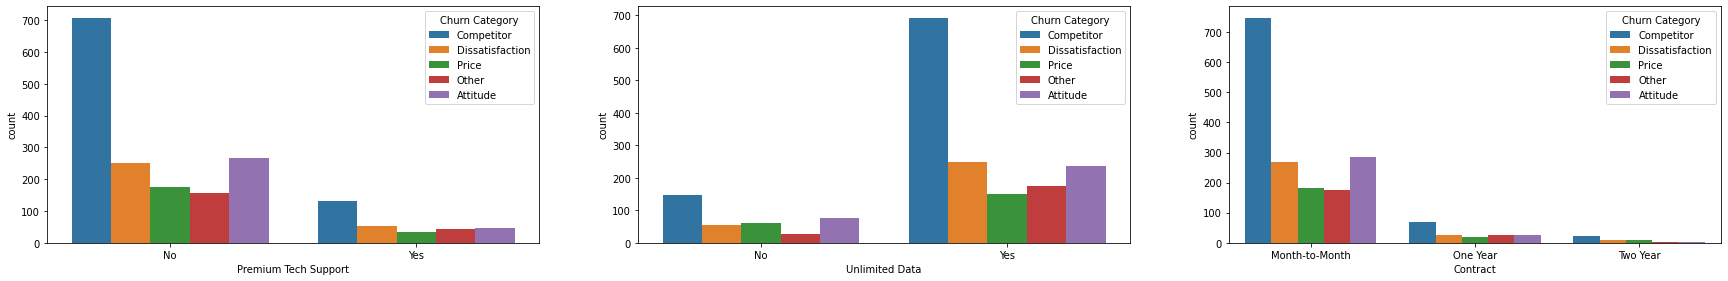

In [ ]:
#@title Churn Reasons Plot


plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=Enhance, x='Gender', hue="Churn Category")
plt.subplot(4,3,2)
sns.countplot(data=Enhance, x='Married', hue="Churn Category")
plt.subplot(4,3,3)
sns.countplot(data=Enhance, x='Number of Dependents', hue="Churn Category")

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=Enhance, x='Offer', hue="Churn Category")
plt.subplot(4,3,2)
sns.countplot(data=Enhance, x='Phone Service', hue="Churn Category")
plt.subplot(4,3,3)
sns.countplot(data=Enhance, x='Internet Service', hue="Churn Category")


plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=Enhance, x='Paperless Billing', hue="Churn Category")
plt.subplot(4,3,2)
sns.countplot(data=Enhance, x='Internet Type', hue="Churn Category")
plt.subplot(4,3,3)
sns.countplot(data=Enhance, x='Payment Method', hue="Churn Category")

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=Enhance, x='Streaming TV', hue="Churn Category")
plt.subplot(4,3,2)
sns.countplot(data=Enhance, x='Streaming Movies', hue="Churn Category")
plt.subplot(4,3,3)
sns.countplot(data=Enhance, x='Streaming Music', hue="Churn Category")

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=Enhance, x='Online Security', hue="Churn Category")
plt.subplot(4,3,2)
sns.countplot(data=Enhance, x='Online Backup', hue="Churn Category")
plt.subplot(4,3,3)
sns.countplot(data=Enhance, x='Device Protection Plan', hue="Churn Category")

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=Enhance, x='Premium Tech Support', hue="Churn Category")
plt.subplot(4,3,2)
sns.countplot(data=Enhance, x='Unlimited Data', hue="Churn Category")
plt.subplot(4,3,3)
sns.countplot(data=Enhance, x='Contract', hue="Churn Category")

                
 
                          



In [ ]:
#@title Churn Reasons Insights

####Insights######
#1- Huge Number of people who uses offer E tends to leave to other competitor so we need to enhance properties of this offer
#2- People who are not using offer tends to leave our company so we need to give them more information about our offers
#3-People who use Fiber Optic as internet type tends to leave my company specially for other competitor services
#4-People who pays using Bank withdrawal tends to leave to other competitor so we need to take a look maybe they are facing problem in paying
#5-People who don't have online security ,backup or device protetection plan, Premium techn Support tends to leave our company so we need to offer customers this services or make them aware about it
#6-Customers who are offered unlimited data highly tends to leave our company so we need to revise our unlimited data offer 
#7-Month to month customers tends to leave so we need to offer them one year or two year contracts to make them loyal and provide them best offers

In [ ]:
#@title Newcomers Study

#Use this data to know what makes new people join?
# what specific features makes new people join us?
new_comers=tel_customer[tel_customer['Customer Status']=='Joined']

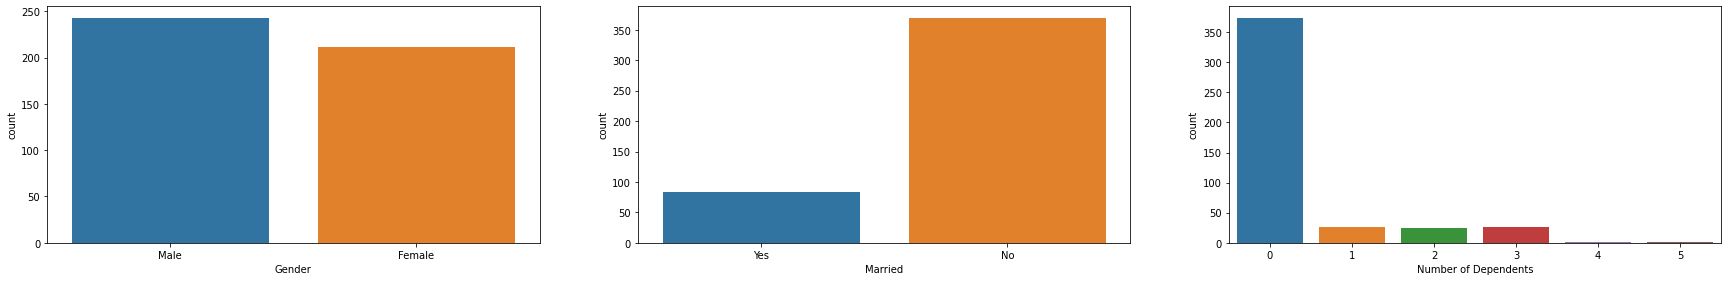

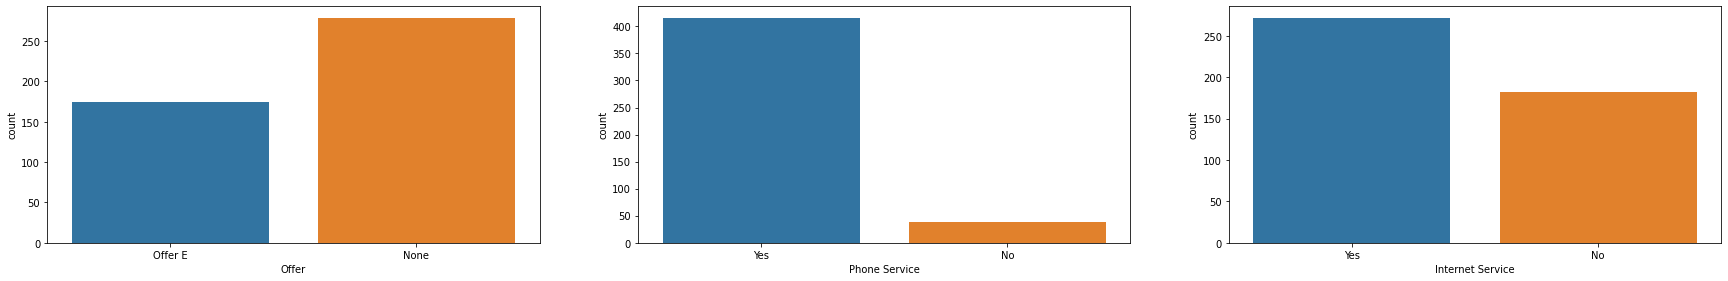

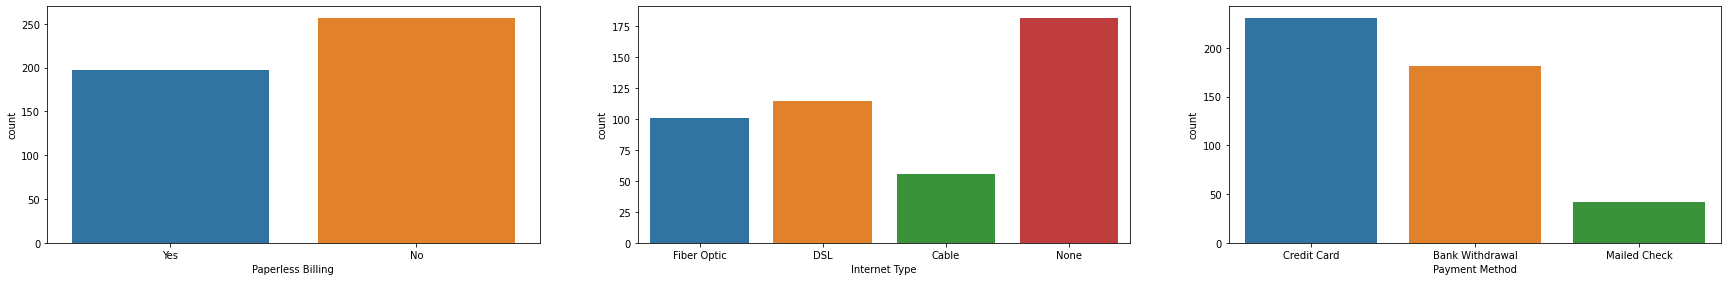

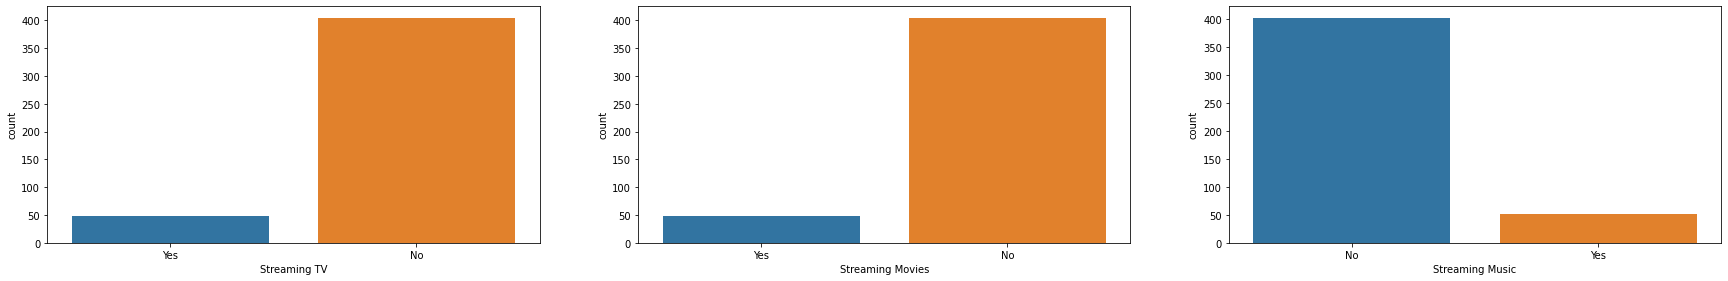

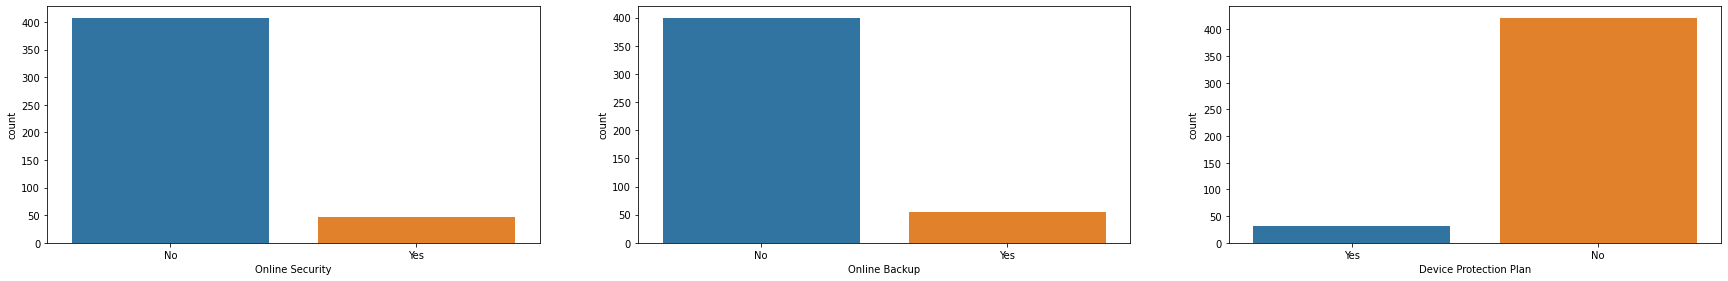

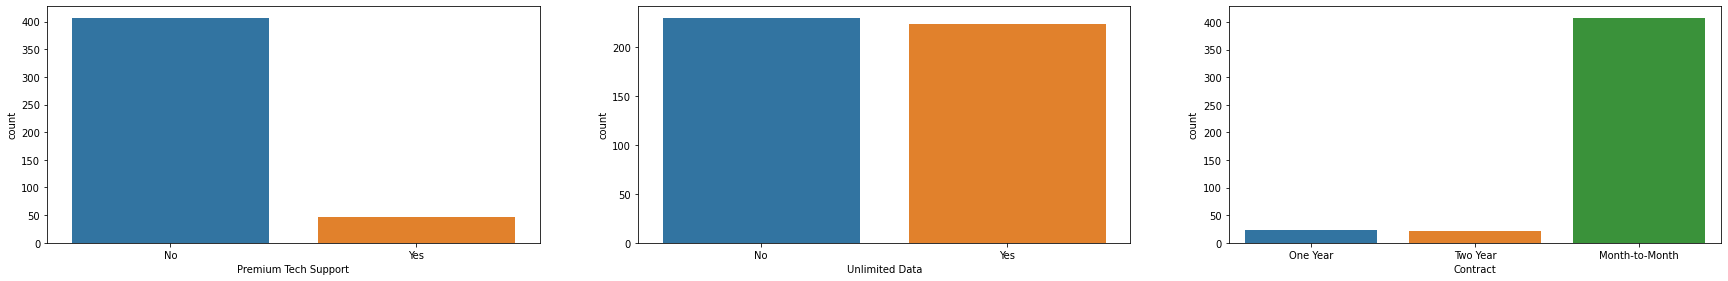

In [ ]:
#@title Newcomers Study Plot

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=new_comers, x='Gender')
plt.subplot(4,3,2)
sns.countplot(data=new_comers, x='Married')
plt.subplot(4,3,3)
sns.countplot(data=new_comers, x='Number of Dependents')

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=new_comers, x='Offer')
plt.subplot(4,3,2)
sns.countplot(data=new_comers, x='Phone Service')
plt.subplot(4,3,3)
sns.countplot(data=new_comers, x='Internet Service')


plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=new_comers, x='Paperless Billing')
plt.subplot(4,3,2)
sns.countplot(data=new_comers, x='Internet Type')
plt.subplot(4,3,3)
sns.countplot(data=new_comers, x='Payment Method')

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=new_comers, x='Streaming TV')
plt.subplot(4,3,2)
sns.countplot(data=new_comers, x='Streaming Movies')
plt.subplot(4,3,3)
sns.countplot(data=new_comers, x='Streaming Music')

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=new_comers, x='Online Security')
plt.subplot(4,3,2)
sns.countplot(data=new_comers, x='Online Backup')
plt.subplot(4,3,3)
sns.countplot(data=new_comers, x='Device Protection Plan')

plt.figure(figsize= (30,20))
plt.subplot(4,3,1)
sns.countplot(data=new_comers, x='Premium Tech Support')
plt.subplot(4,3,2)
sns.countplot(data=new_comers, x='Unlimited Data')
plt.subplot(4,3,3)
sns.countplot(data=new_comers, x='Contract')

                
 
                          



In [ ]:
#@title Newcomers Study Insights

#Insights
#1-New comers customers go for offer E or No offers and by studying churn reasons, we can understand that offer E is so promising that people go for it but it doesnot met their expectations so we need to enhance offer E or offer people other offers


**Final Data to Process**

In [ ]:
#Final Data Overall to study
tel_customer = tel_customer.drop(columns=['Churn Category','Customer Status'])


In [ ]:
tel_customer.head()

,Gender,Age,Married,Number of Dependents,City,Population,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Value
0,Male,78,No,0,Los Angeles,68701,0,1,None,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1
1,Female,74,Yes,1,Los Angeles,55668,1,8,Offer E,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1
2,Male,71,No,3,Los Angeles,47534,0,18,Offer D,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1
3,Female,78,Yes,1,Inglewood,27778,1,25,Offer C,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,1
4,Female,80,Yes,1,Whittier,26265,1,37,Offer C,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Get Categorical Columns
cat_features=[i for i in tel_customer.columns if tel_customer.dtypes[i]=='object']

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label

for column in cat_features:
  tel_customer[column] = le.fit_transform(tel_customer[column])




**Performance Before Feature Selection**

In [ ]:
#First Model Trial
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
y = tel_customer['Churn Value']
x = tel_customer.drop(['Churn Value'],axis = 1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


In [ ]:
#Models Train and Test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score




Log_Reg_model = LogisticRegression(max_iter=5000)
Nb_model = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=4)
svm_model = svm.SVC(probability=True)
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier()
models=[Log_Reg_model,Nb_model,svm_model,DT_model,RF_model,XGB_model]


In [ ]:

for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print(model)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')





LogisticRegression(max_iter=5000)
Model Accuracy = 82.8 %
Model recall = 67.0 %
Model precision = 70.7 %
Model f1_score = 68.8 %
ROC_AUC : 0.8864


GaussianNB()
Model Accuracy = 72.5 %
Model recall = 81.2 %
Model precision = 51.0 %
Model f1_score = 62.7 %
ROC_AUC : 0.8356




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)
Model Accuracy = 71.6 %
Model recall = 0.0 %
Model precision = 0.0 %
Model f1_score = 0.0 %
ROC_AUC : 0.7928


DecisionTreeClassifier()
Model Accuracy = 77.9 %
Model recall = 63.0 %
Model precision = 60.7 %
Model f1_score = 61.8 %
ROC_AUC : 0.7342


RandomForestClassifier()
Model Accuracy = 83.8 %
Model recall = 61.3 %
Model precision = 77.0 %
Model f1_score = 68.2 %
ROC_AUC : 0.8922


XGBClassifier()
Model Accuracy = 85.2 %
Model recall = 66.2 %
Model precision = 78.4 %
Model f1_score = 71.8 %
ROC_AUC : 0.9171




**Chi Squared**

In [ ]:
tel_customer.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Population', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Value'],
      dtype='object')

In [ ]:
#Chi squared test
columns_test=['Gender', 'Married', 'Number of Dependents', 'City',
        'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method']

  

In [ ]:
# P Value>0.01 Get Dropped "Independet from the output"
diction={}
from scipy.stats import chi2_contingency 
for i in columns_test:
  chisqt = pd.crosstab(tel_customer[i] ,tel_customer['Churn Value'], margins=True)
  value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
  if chi2_contingency(value)[1]>0.01:
    diction[i]=chi2_contingency(value)[1]

print(diction)


{'Gender': 0.7701397772756198, 'City': 0.09071795328941248, 'Tenure in Months': 0.023066679426598773, 'Phone Service': 0.6051951937937965}


**Chi Squared Conc: Drop Gender ,city, phone service, tensure in months**

In [ ]:
#Drop Gender ,city, phone service, tensure in months
ChiSquared_Data= tel_customer.drop(columns=['Gender','City','Phone Service','Tenure in Months'])


In [ ]:
#Second Trial

y = ChiSquared_Data['Churn Value']
x = ChiSquared_Data.drop(['Churn Value'],axis = 1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)



In [ ]:
#Models Train and Test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score




Log_Reg_model = LogisticRegression(max_iter=5000)
Nb_model = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=4)
svm_model = svm.SVC(probability=True)
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier()
models=[Log_Reg_model,Nb_model,svm_model,DT_model,RF_model,XGB_model]


In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print(model)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')


LogisticRegression(max_iter=5000)
Model Accuracy = 82.3 %
Model recall = 66.5 %
Model precision = 69.6 %
Model f1_score = 68.0 %
ROC_AUC : 0.8818


GaussianNB()
Model Accuracy = 72.5 %
Model recall = 82.0 %
Model precision = 51.0 %
Model f1_score = 62.9 %
ROC_AUC : 0.8381




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)
Model Accuracy = 71.6 %
Model recall = 0.0 %
Model precision = 0.0 %
Model f1_score = 0.0 %
ROC_AUC : 0.7934


DecisionTreeClassifier()
Model Accuracy = 78.0 %
Model recall = 58.5 %
Model precision = 61.9 %
Model f1_score = 60.2 %
ROC_AUC : 0.7211


RandomForestClassifier()
Model Accuracy = 84.5 %
Model recall = 64.0 %
Model precision = 77.6 %
Model f1_score = 70.1 %
ROC_AUC : 0.9008


XGBClassifier()
Model Accuracy = 85.2 %
Model recall = 66.5 %
Model precision = 78.0 %
Model f1_score = 71.8 %
ROC_AUC : 0.9180




In [ ]:
#@title Annova Selection
#Third Trial
#Filter Numerical Data
numerical = list(set(tel_customer.columns) - set(columns_test))


In [ ]:
Numberical_data=tel_customer[numerical]

In [ ]:
y = Numberical_data['Churn Value']
x = Numberical_data.drop(['Churn Value'],axis = 1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
#Annova
# feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs




Feature 0: 209.372782
Feature 1: 0.006742
Feature 2: 299.432419
Feature 3: 76.989819
Feature 4: 14.899783
Feature 5: 234.549067
Feature 6: 7.236246
Feature 7: 306.463122
Feature 8: 0.010319
Feature 9: 12.152476


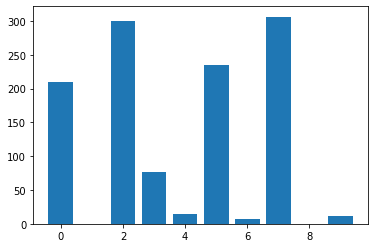

In [ ]:
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:

'''
['Monthly Charge',
 'Total Revenue',
 'Age',
 'Total Charges', 
 'Total Long Distance Charges'
'''

#Trial good
annova= tel_customer.drop(columns=['Total Extra Data Charges','Age','Total Charges','Avg Monthly Long Distance Charges',
 'Population'])

In [ ]:
y = annova['Churn Value']
x = annova.drop(['Churn Value'],axis = 1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


In [ ]:
#Models Train and Test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score




Log_Reg_model = LogisticRegression(max_iter=5000)
Nb_model = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=4)
svm_model = svm.SVC(probability=True)
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier()
models=[Log_Reg_model,Nb_model,svm_model,DT_model,RF_model,XGB_model]


In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print(model)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')


LogisticRegression(max_iter=5000)
Model Accuracy = 83.2 %
Model recall = 68.5 %
Model precision = 71.2 %
Model f1_score = 69.8 %
ROC_AUC : 0.8971


GaussianNB()
Model Accuracy = 78.4 %
Model recall = 77.2 %
Model precision = 59.1 %
Model f1_score = 67.0 %
ROC_AUC : 0.8640




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)
Model Accuracy = 71.6 %
Model recall = 0.0 %
Model precision = 0.0 %
Model f1_score = 0.0 %
ROC_AUC : 0.7837


DecisionTreeClassifier()
Model Accuracy = 78.4 %
Model recall = 58.2 %
Model precision = 63.0 %
Model f1_score = 60.5 %
ROC_AUC : 0.7234


RandomForestClassifier()
Model Accuracy = 83.3 %
Model recall = 59.5 %
Model precision = 76.3 %
Model f1_score = 66.9 %
ROC_AUC : 0.8912


XGBClassifier()
Model Accuracy = 83.5 %
Model recall = 64.8 %
Model precision = 74.0 %
Model f1_score = 69.1 %
ROC_AUC : 0.9103




In [ ]:
#@title Mutual Information Selection
#Mutual Information Category Input and Output


mutual=tel_customer.drop(tel_customer.columns.difference(['Gender', 'Married', 'Number of Dependents', 'City',
        'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method','Churn Value']
), 1)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
y = mutual['Churn Value']
x = mutual.drop(['Churn Value'],axis = 1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)



In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.00914387, 0.01482819, 0.04972408, 0.01821482, 0.07558018,
       0.07447033, 0.04486806, 0.00515897, 0.        , 0.03003027,
       0.05000552, 0.00874151, 0.0077264 , 0.        , 0.01482622,
       0.        , 0.00760997, 0.00616091, 0.0170762 , 0.12180046,
       0.02111304, 0.02202333])

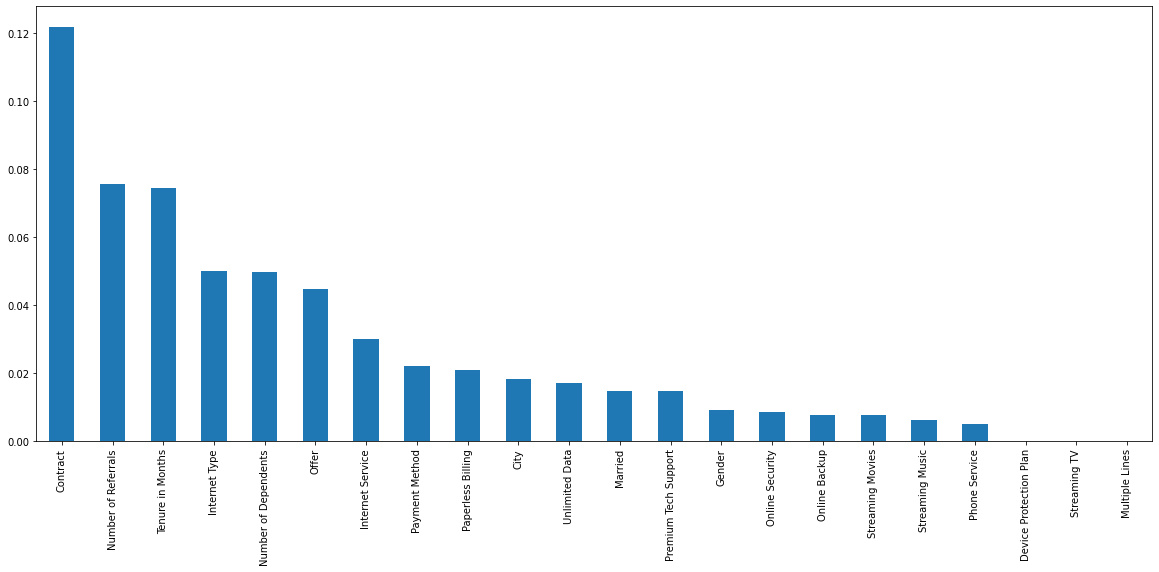

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['Number of Dependents', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Internet Type', 'Contract', 'Payment Method'],
      dtype='object')

In [ ]:
cat=['Number of Dependents', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Internet Type', 'Contract', 'Payment Method']
num=['Monthly Charge',
 'Total Revenue',
 'Age',
 'Total Charges', 
 'Total Long Distance Charges']
all=cat+num
all

['Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Internet Type',
 'Contract',
 'Payment Method',
 'Monthly Charge',
 'Total Revenue',
 'Age',
 'Total Charges',
 'Total Long Distance Charges']

In [ ]:
#Third Trial 

y = tel_customer['Churn Value']
x = tel_customer[all]
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)



In [ ]:
#Models Train and Test
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score




Log_Reg_model = LogisticRegression(max_iter=5000)
Nb_model = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=4)
svm_model = svm.SVC(probability=True)
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier()
models=[Log_Reg_model,Nb_model,svm_model,DT_model,RF_model,XGB_model]


In [ ]:
for model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print(model)
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')


LogisticRegression(max_iter=5000)
Model Accuracy = 81.3 %
Model recall = 63.5 %
Model precision = 68.5 %
Model f1_score = 65.9 %
ROC_AUC : 0.8741


GaussianNB()
Model Accuracy = 75.9 %
Model recall = 81.8 %
Model precision = 55.1 %
Model f1_score = 65.9 %
ROC_AUC : 0.8492




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)
Model Accuracy = 71.6 %
Model recall = 0.0 %
Model precision = 0.0 %
Model f1_score = 0.0 %
ROC_AUC : 0.7909


DecisionTreeClassifier()
Model Accuracy = 77.1 %
Model recall = 58.5 %
Model precision = 60.0 %
Model f1_score = 59.2 %
ROC_AUC : 0.7152


RandomForestClassifier()
Model Accuracy = 83.3 %
Model recall = 61.8 %
Model precision = 74.8 %
Model f1_score = 67.7 %
ROC_AUC : 0.8890


XGBClassifier()
Model Accuracy = 84.0 %
Model recall = 63.2 %
Model precision = 76.2 %
Model f1_score = 69.1 %
ROC_AUC : 0.9096




In [ ]:
#@title Wrapper 7 to 9 Features
#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(7,10):
  sfs = SFS(XGBClassifier( max_iter=10000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

Number of Features is: 7
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Contract', 'Monthly Charge', 'Total Charges']
Number of Features is: 8
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Contract', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 9
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Streaming Music', 'Contract', 'Payment Method', 'Monthly Charge', 'Total Charges']


In [ ]:
#@title Wrapper 7 to 9 Features Evaluation

for element in compound:
  y = tel_customer['Churn Value']
  x = tel_customer[element]
  x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
  XGB_model = XGBClassifier()
  XGB_model.fit(x_train,y_train)
  y_pred = XGB_model.predict(x_test)

  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print("Number Of features is ",len(element))
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')




Number Of features is  7
Model Accuracy = 84.2 %
Model recall = 61.9 %
Model precision = 74.6 %
Model f1_score = 67.6 %
ROC_AUC : 0.9130


Number Of features is  8
Model Accuracy = 85.3 %
Model recall = 69.7 %
Model precision = 73.8 %
Model f1_score = 71.7 %
ROC_AUC : 0.9104


Number Of features is  9
Model Accuracy = 85.5 %
Model recall = 68.3 %
Model precision = 75.4 %
Model f1_score = 71.7 %
ROC_AUC : 0.9176




In [ ]:
#@title Wrapper 10 to 14 Features
#importing the necessary libraries
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(10,15):
  sfs = SFS(XGBClassifier( max_iter=10000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

Number of Features is: 10
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 11
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 12
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Online Security', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 13
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Online Security', 'Premium Tech Support', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 14
['Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Inte

In [ ]:
#@title Wrapper 10 to 14 Features Evaluation

for element in compound:
  y = tel_customer['Churn Value']
  x = tel_customer[element]
  x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
  XGB_model = XGBClassifier()
  XGB_model.fit(x_train,y_train)
  y_pred = XGB_model.predict(x_test)

  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print("Number Of features is ",len(element))
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')




Number Of features is  10
Model Accuracy = 84.0 %
Model recall = 63.5 %
Model precision = 73.8 %
Model f1_score = 68.3 %
ROC_AUC : 0.9122


Number Of features is  11
Model Accuracy = 85.2 %
Model recall = 66.0 %
Model precision = 74.3 %
Model f1_score = 69.9 %
ROC_AUC : 0.9148


Number Of features is  12
Model Accuracy = 85.0 %
Model recall = 67.5 %
Model precision = 72.6 %
Model f1_score = 70.0 %
ROC_AUC : 0.9170


Number Of features is  13
Model Accuracy = 84.7 %
Model recall = 64.1 %
Model precision = 72.1 %
Model f1_score = 67.9 %
ROC_AUC : 0.9174


Number Of features is  14
Model Accuracy = 84.9 %
Model recall = 62.5 %
Model precision = 73.8 %
Model f1_score = 67.7 %
ROC_AUC : 0.9061




In [ ]:
#@title Wrapper 15 to 24 Features
#importing the necessary libraries
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(15,25):
  sfs = SFS(XGBClassifier( max_iter=10000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

Number of Features is: 15
['Gender', 'Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Internet Type', 'Online Security', 'Premium Tech Support', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 16
['Gender', 'Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Internet Service', 'Internet Type', 'Online Security', 'Premium Tech Support', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 17
['Gender', 'Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Internet Service', 'Internet Type', 'Online Security', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
Number of Features is: 18
['Gender', 'Age', 'Number of Dependents', 'City', 'Number of Refe

In [ ]:
#@title Wrapper 15 to 24 Features Evaluation

for element in compound:
  y = tel_customer['Churn Value']
  x = tel_customer[element]
  x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
  XGB_model = XGBClassifier()
  XGB_model.fit(x_train,y_train)
  y_pred = XGB_model.predict(x_test)

  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print("Number Of features is ",len(element))
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')




Number Of features is  15
Model Accuracy = 85.0 %
Model recall = 66.2 %
Model precision = 72.5 %
Model f1_score = 69.2 %
ROC_AUC : 0.9061


Number Of features is  16
Model Accuracy = 87.0 %
Model recall = 68.4 %
Model precision = 80.1 %
Model f1_score = 73.7 %
ROC_AUC : 0.9246


Number Of features is  17
Model Accuracy = 84.9 %
Model recall = 63.4 %
Model precision = 73.9 %
Model f1_score = 68.3 %
ROC_AUC : 0.9024


Number Of features is  18
Model Accuracy = 85.5 %
Model recall = 68.0 %
Model precision = 77.1 %
Model f1_score = 72.3 %
ROC_AUC : 0.9163


Number Of features is  19
Model Accuracy = 85.7 %
Model recall = 65.1 %
Model precision = 76.6 %
Model f1_score = 70.4 %
ROC_AUC : 0.9191


Number Of features is  20
Model Accuracy = 84.9 %
Model recall = 61.8 %
Model precision = 79.0 %
Model f1_score = 69.4 %
ROC_AUC : 0.9116


Number Of features is  21
Model Accuracy = 85.4 %
Model recall = 66.5 %
Model precision = 77.2 %
Model f1_score = 71.5 %
ROC_AUC : 0.9123


Number Of features i

In [ ]:
#@title Wrapper 25 to 30 Features
#importing the necessary libraries
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(25,31):
  sfs = SFS(XGBClassifier( max_iter=10000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

Number of Features is: 25
['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges']
Number of Features is: 26
['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges']
Number of Features is: 27
['Gender', 'Age', 'Ma

In [ ]:
#@title Wrapper 25 to 30 Features Evaluation

for element in compound:
  y = tel_customer['Churn Value']
  x = tel_customer[element]
  x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
  XGB_model = XGBClassifier()
  XGB_model.fit(x_train,y_train)
  y_pred = XGB_model.predict(x_test)

  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print("Number Of features is ",len(element))
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')




Number Of features is  25
Model Accuracy = 85.8 %
Model recall = 67.1 %
Model precision = 75.4 %
Model f1_score = 71.0 %
ROC_AUC : 0.9254


Number Of features is  26
Model Accuracy = 84.7 %
Model recall = 65.4 %
Model precision = 73.7 %
Model f1_score = 69.3 %
ROC_AUC : 0.9102


Number Of features is  27
Model Accuracy = 83.5 %
Model recall = 62.5 %
Model precision = 72.1 %
Model f1_score = 67.0 %
ROC_AUC : 0.8963


Number Of features is  28
Model Accuracy = 86.5 %
Model recall = 70.6 %
Model precision = 75.6 %
Model f1_score = 73.0 %
ROC_AUC : 0.9218


Number Of features is  29
Model Accuracy = 86.1 %
Model recall = 66.6 %
Model precision = 77.8 %
Model f1_score = 71.8 %
ROC_AUC : 0.9200


Number Of features is  30
Model Accuracy = 84.7 %
Model recall = 66.5 %
Model precision = 72.2 %
Model f1_score = 69.2 %
ROC_AUC : 0.9170




In [ ]:
#@title Final Decision
#16 Features are the highest performance 
#['Gender', 'Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Internet Service', 'Internet Type', 'Online Security', 'Premium Tech Support', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']
from sklearn.model_selection import train_test_split

y = tel_customer['Churn Value']
x = tel_customer[['Gender', 'Age', 'Number of Dependents', 'City', 'Number of Referrals', 'Phone Service', 'Internet Service', 'Internet Type', 'Online Security', 'Premium Tech Support', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']]
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


NameError: ignored

In [ ]:
#@title Hypertune XGB Boost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

PARAMETERS = {'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
          }
XGB_model = XGBClassifier()
grid=GridSearchCV(XGB_model,param_grid=PARAMETERS,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)


NameError: ignored

In [ ]:
XGB_model = XGBClassifier(colsample_bytree=0.5, learning_rate= 0.1, max_depth =6,min_child_weight=1,n_estimators=100,subsample=1)


XGB_model.fit(x_train,y_train)
y_predxgb = XGB_model.predict(x_test)
accuracy  = metrics.accuracy_score(y_test,y_predxgb)
recall = metrics.recall_score(y_test,y_predxgb)
precision = metrics.precision_score(y_test,y_predxgb)
f1_score = metrics.f1_score(y_test,y_predxgb)
y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
ROC_AUC = roc_auc_score(y_test,y_pred_proba)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )
print("ROC_AUC : {:.4f}".format(ROC_AUC))
print('\n')



Model Accuracy = 85.2 %
Model recall = 66.2 %
Model precision = 74.5 %
Model f1_score = 70.1 %
ROC_AUC : 0.9083




In [ ]:
#@title Logistic Regression Wrapper
#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(12,20):
  sfs = SFS(LogisticRegression( max_iter=5000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

Number of Features is: 12
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Online Security', 'Premium Tech Support', 'Contract', 'Monthly Charge', 'Total Revenue']
Number of Features is: 13
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Online Security', 'Premium Tech Support', 'Contract', 'Monthly Charge', 'Total Charges', 'Total Revenue']
Number of Features is: 14
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Online Security', 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Monthly Charge', 'Total Charges', 'Total Revenue']
Number of Features is: 15
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Online Security', 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Monthly Charge', 'Total Charges', 'Tot

In [ ]:
#@title Wrapper 25 to 30 Features Evaluation

for element in compound:
  y = tel_customer['Churn Value']
  x = tel_customer[element]
  x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
  Log_Reg_model = LogisticRegression(max_iter=5000)
  Log_Reg_model.fit(x_train,y_train)
  y_pred = Log_Reg_model.predict(x_test)

  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = Log_Reg_model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print("Number Of features is ",len(element))
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')




Number Of features is  12
Model Accuracy = 82.7 %
Model recall = 66.2 %
Model precision = 70.9 %
Model f1_score = 68.5 %
ROC_AUC : 0.8989


Number Of features is  13
Model Accuracy = 83.4 %
Model recall = 67.2 %
Model precision = 72.3 %
Model f1_score = 69.7 %
ROC_AUC : 0.8978


Number Of features is  14
Model Accuracy = 82.8 %
Model recall = 66.8 %
Model precision = 71.0 %
Model f1_score = 68.8 %
ROC_AUC : 0.8984


Number Of features is  15
Model Accuracy = 83.0 %
Model recall = 66.8 %
Model precision = 71.6 %
Model f1_score = 69.1 %
ROC_AUC : 0.8977


Number Of features is  16
Model Accuracy = 83.2 %
Model recall = 66.0 %
Model precision = 72.3 %
Model f1_score = 69.0 %
ROC_AUC : 0.8988


Number Of features is  17
Model Accuracy = 83.3 %
Model recall = 67.0 %
Model precision = 72.2 %
Model f1_score = 69.5 %
ROC_AUC : 0.9001


Number Of features is  18
Model Accuracy = 83.5 %
Model recall = 68.5 %
Model precision = 72.1 %
Model f1_score = 70.3 %
ROC_AUC : 0.9009


Number Of features i

In [ ]:
#@title Logistic Regression Wrapper
#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(15,25):
  sfs = SFS(LogisticRegression( max_iter=5000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

Number of Features is: 15
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Online Security', 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Monthly Charge', 'Total Charges', 'Total Revenue']
Number of Features is: 16
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Monthly Charge', 'Total Charges', 'Total Revenue']
Number of Features is: 17
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Revenue']
Number of Features is: 18
['Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenu

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Number of Features is: 22
['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Revenue']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Number of Features is: 23
['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Premium Tech Support', 'Streaming Movies', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Revenue']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Number of Features is: 24
['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Premium Tech Support', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Revenue']


In [ ]:
#@title Wrapper 25 to 30 Features Evaluation

for element in compound:
  y = tel_customer['Churn Value']
  x = tel_customer[element]
  x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
  Log_Reg_model = LogisticRegression(max_iter=5000)
  Log_Reg_model.fit(x_train,y_train)
  y_pred = Log_Reg_model.predict(x_test)

  accuracy  = metrics.accuracy_score(y_test,y_pred)
  recall = metrics.recall_score(y_test,y_pred)
  precision = metrics.precision_score(y_test,y_pred)
  f1_score = metrics.f1_score(y_test,y_pred)
  y_pred_proba = Log_Reg_model.predict_proba(x_test)[::,1]
  ROC_AUC = roc_auc_score(y_test,y_pred_proba)

  print("Number Of features is ",len(element))
  print(f'Model Accuracy = {100*accuracy:0.3} %' )
  print(f'Model recall = {100*recall:0.3} %' )
  print(f'Model precision = {100*precision:0.3} %' )
  print(f'Model f1_score = {100*f1_score:0.3} %' )
  print("ROC_AUC : {:.4f}".format(ROC_AUC))
  print('\n')




Number Of features is  15
Model Accuracy = 83.0 %
Model recall = 66.8 %
Model precision = 71.6 %
Model f1_score = 69.1 %
ROC_AUC : 0.8977


Number Of features is  16
Model Accuracy = 83.2 %
Model recall = 66.0 %
Model precision = 72.3 %
Model f1_score = 69.0 %
ROC_AUC : 0.8988


Number Of features is  17
Model Accuracy = 83.3 %
Model recall = 67.0 %
Model precision = 72.2 %
Model f1_score = 69.5 %
ROC_AUC : 0.9001


Number Of features is  18
Model Accuracy = 83.5 %
Model recall = 68.5 %
Model precision = 72.1 %
Model f1_score = 70.3 %
ROC_AUC : 0.9009


Number Of features is  19
Model Accuracy = 83.3 %
Model recall = 68.0 %
Model precision = 71.8 %
Model f1_score = 69.8 %
ROC_AUC : 0.9010


Number Of features is  20
Model Accuracy = 83.3 %
Model recall = 69.2 %
Model precision = 71.0 %
Model f1_score = 70.1 %
ROC_AUC : 0.8999


Number Of features is  21
Model Accuracy = 83.0 %
Model recall = 68.2 %
Model precision = 70.9 %
Model f1_score = 69.6 %
ROC_AUC : 0.9002


Number Of features i

In [ ]:
#@title Logistic Regression Wrapper
#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# Sequential Forward Selection(sfs)
compound=[]
for i in range(25,29):
  sfs = SFS(LogisticRegression( max_iter=5000),
          n_features_to_select=i,
          scoring = 'roc_auc'
          )

  y = tel_customer['Churn Value']
  x = tel_customer.drop(['Churn Value'],axis = 1)
  sfs.fit(x,y)
  print("Number of Features is:",i)
  x=list(sfs.get_feature_names_out())
  print(x)
  compound.append(x)
  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Number of Features is: 25
['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Revenue']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored